In [1]:
import requests
import pandas as pd


def get_bcb_data (file_path):

    response = requests.get(file_path)

    # Verificando se a solicitação foi bem-sucedida
    if response.status_code == 200:
        # Convertendo a resposta JSON em um dicionário
        data = response.json()

        # Extraindo os dados desejados
        df = pd.json_normalize(data['value'])

        # Exibindo o DataFrame
    else:
        print(f"Erro na solicitação: {response.status_code}")

    return df.dropna()

def risco_alto(risco):
    mapping = {
        'AA-C': '0',
        'D-H': '1'
        }
    return mapping.get(risco)

In [2]:
caminho = 'https://olinda.bcb.gov.br/olinda/servico/scr_sub_regiao/versao/v1/odata/scr_sub_regiao(DataBase=@DataBase)?@DataBase=202407&$format=json&$select=DATA_BASE,CLIENTE,ESTADO,SUB_REGIAO,MODALIDADE,RISCO,OPERACOES,CARTEIRA'

df_bcb = get_bcb_data(caminho).dropna()

df_bcb['RISCO'] = df_bcb['RISCO'].apply(risco_alto)

df_bcb = df_bcb.drop(columns=['DATA_BASE'])

df_bcb.head()

CLIENTE ESTADO SUB_REGIAO                           MODALIDADE RISCO  \
0      PF     BA         41               Rural e Agroindustrial     1   
1      PF     MG         34                      Outros Créditos     1   
2      PF     RS         94                      Outros Créditos     0   
3      PJ     SP         13                      Outros Créditos     0   
4      PF     RS         97  Empréstimo sem Consignação em Folha     0   

   OPERACOES    CARTEIRA  
0        339    34553.85  
1      17072   103887.75  
2     418050   407597.87  
3     351468  3621556.42  
4     736481  1694392.10

In [3]:
X = df_bcb.drop(columns=['RISCO'])
y = df_bcb['RISCO']

In [4]:
X = pd.get_dummies(X)

In [5]:
X.head()

OPERACOES    CARTEIRA  CLIENTE_PF  CLIENTE_PJ  ESTADO_AC  ESTADO_AL  \
0        339    34553.85        True       False      False      False   
1      17072   103887.75        True       False      False      False   
2     418050   407597.87        True       False      False      False   
3     351468  3621556.42       False        True      False      False   
4     736481  1694392.10        True       False      False      False   

   ESTADO_AM  ESTADO_AP  ESTADO_BA  ESTADO_CE  ...  \
0      False      False       True      False  ...   
1      False      False      False      False  ...   
2      False      False      False      False  ...   
3      False      False      False      False  ...   
4      False      False      False      False  ...   

   MODALIDADE_Empréstimo com Consignação em Folha  \
0                                           False   
1                                           False   
2                                           False   
3                                           False   
4                                           False   

   MODALIDADE_Empréstimo sem Consignação em Folha  \
0                                           False   
1                                           False   
2                                           False   
3                                           False   
4                                            True   

   MODALIDADE_Financiamento de Infraestrutura/Desenvolvimento/Projeto e Outros Créditos  \
0                                              False                                      
1                                              False                                      
2                                              False                                      
3                                              False                                      
4                                              False                                      

   MODALIDADE_Habitacional  MODALIDADE_Investimento  \
0                    False                    False   
1                    False                    False   
2                    False                    False   
3                    False                    False   
4                    False                    False   

   MODALIDADE_Não Identificado  MODALIDADE_Operações com Recebíveis  \
0                        False                                False   
1                        False                                False   
2                        False                                False   
3                        False                                False   
4                        False                                False   

   MODALIDADE_Outros Créditos  MODALIDADE_Rural e Agroindustrial  \
0                       False                               True   
1                        True                              False   
2                        True                              False   
3                        True                              False   
4                       False                              False   

   MODALIDADE_Veículos  
0                False  
1                False  
2                False  
3                False  
4                False  

[5 rows x 145 columns]

In [6]:
#Baixando demais bibliotecas para executar o modelo de agrupamento

import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [14]:
inicio = 2
fim = 10
passo = 1
silhouette = {}

num_clusters = list(range(inicio, fim+passo, passo))

In [15]:
def silhouette_plot(silhouette: dict, clusters: str) -> None:
  g=plt.figure(2)
  plt.plot(list(silhouette.keys()), list(silhouette.values()), label="Método Silhouette", color='g')
  plt.ylabel('Silhouette Score', fontsize=18)
  plt.xlabel('Clusters', fontsize=18)
  plt.xticks(fontsize=18)
  plt.yticks(fontsize=18)
  plt.legend(loc='upper right')
  plt.grid(linestyle='dotted', linewidth=1)
  plt.show()



for k in num_clusters:
  print(f"Testando k = {k}")
  model = KMeans(n_clusters=k, max_iter=1000)
  model.fit(X)
  preds = model.predict(X)
  silhouette[k] = silhouette_score(X, preds)

Testando k = 2
Testando k = 3
Testando k = 4
Testando k = 5
Testando k = 6
Testando k = 7
Testando k = 8
Testando k = 9
Testando k = 10


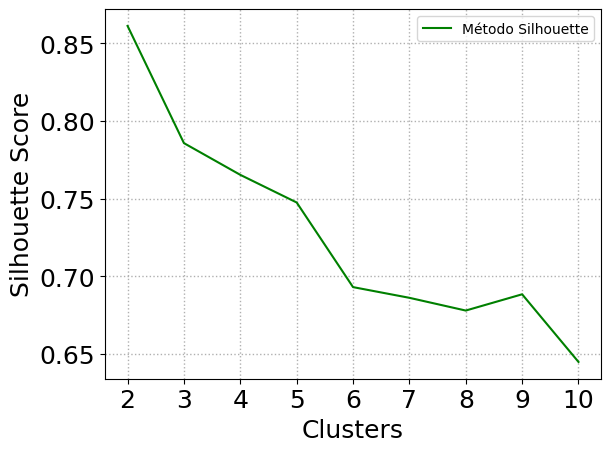

In [16]:
silhouette_plot(silhouette, clusters=str(fim))

In [22]:
silhouette_avg = silhouette_score(X, kmeans_preds)

silhouette_avg

0.8611338000015515